In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data= pd.read_excel('Printing parameters, melt pool geometry and density of IN625 test coupons.xlsx')
data.head()

,Spec,Power,Speed,Hatching,Energy density,Build rate,Diameter to thickness,Width to height,length to width,Density
0,1,160,2.8,0.092,15.6,37.0,1.0,1.00,5.7,78.3
1,2,160,2.8,0.061,23.3,24.7,1.0,1.50,5.7,87.6
2,3,160,2.8,0.052,27.4,21.0,1.0,1.76,5.7,91.6
3,4,160,2.8,0.046,31.1,18.5,1.0,2.00,5.7,95.6
4,5,160,2.8,0.037,38.9,14.8,1.0,2.50,5.7,95.6


<AxesSubplot:xlabel='Build rate', ylabel='Density'>

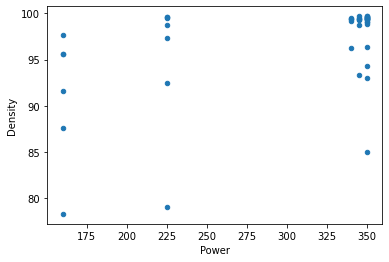

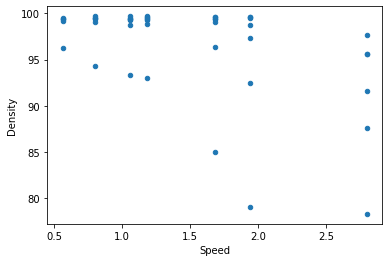

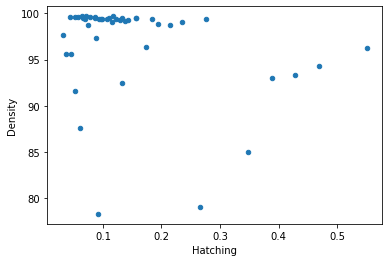

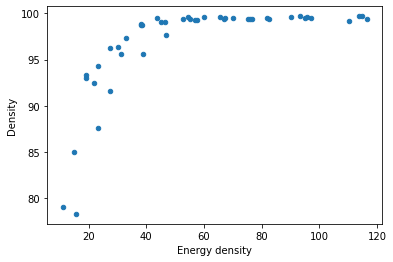

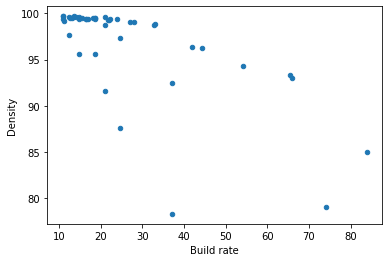

In [3]:
data.plot(kind='scatter', x='Power', y='Density')
data.plot(kind='scatter', x='Speed', y='Density')
data.plot(kind='scatter', x='Hatching', y='Density')
data.plot(kind='scatter', x='Energy density', y='Density')
data.plot(kind='scatter', x='Build rate', y='Density')

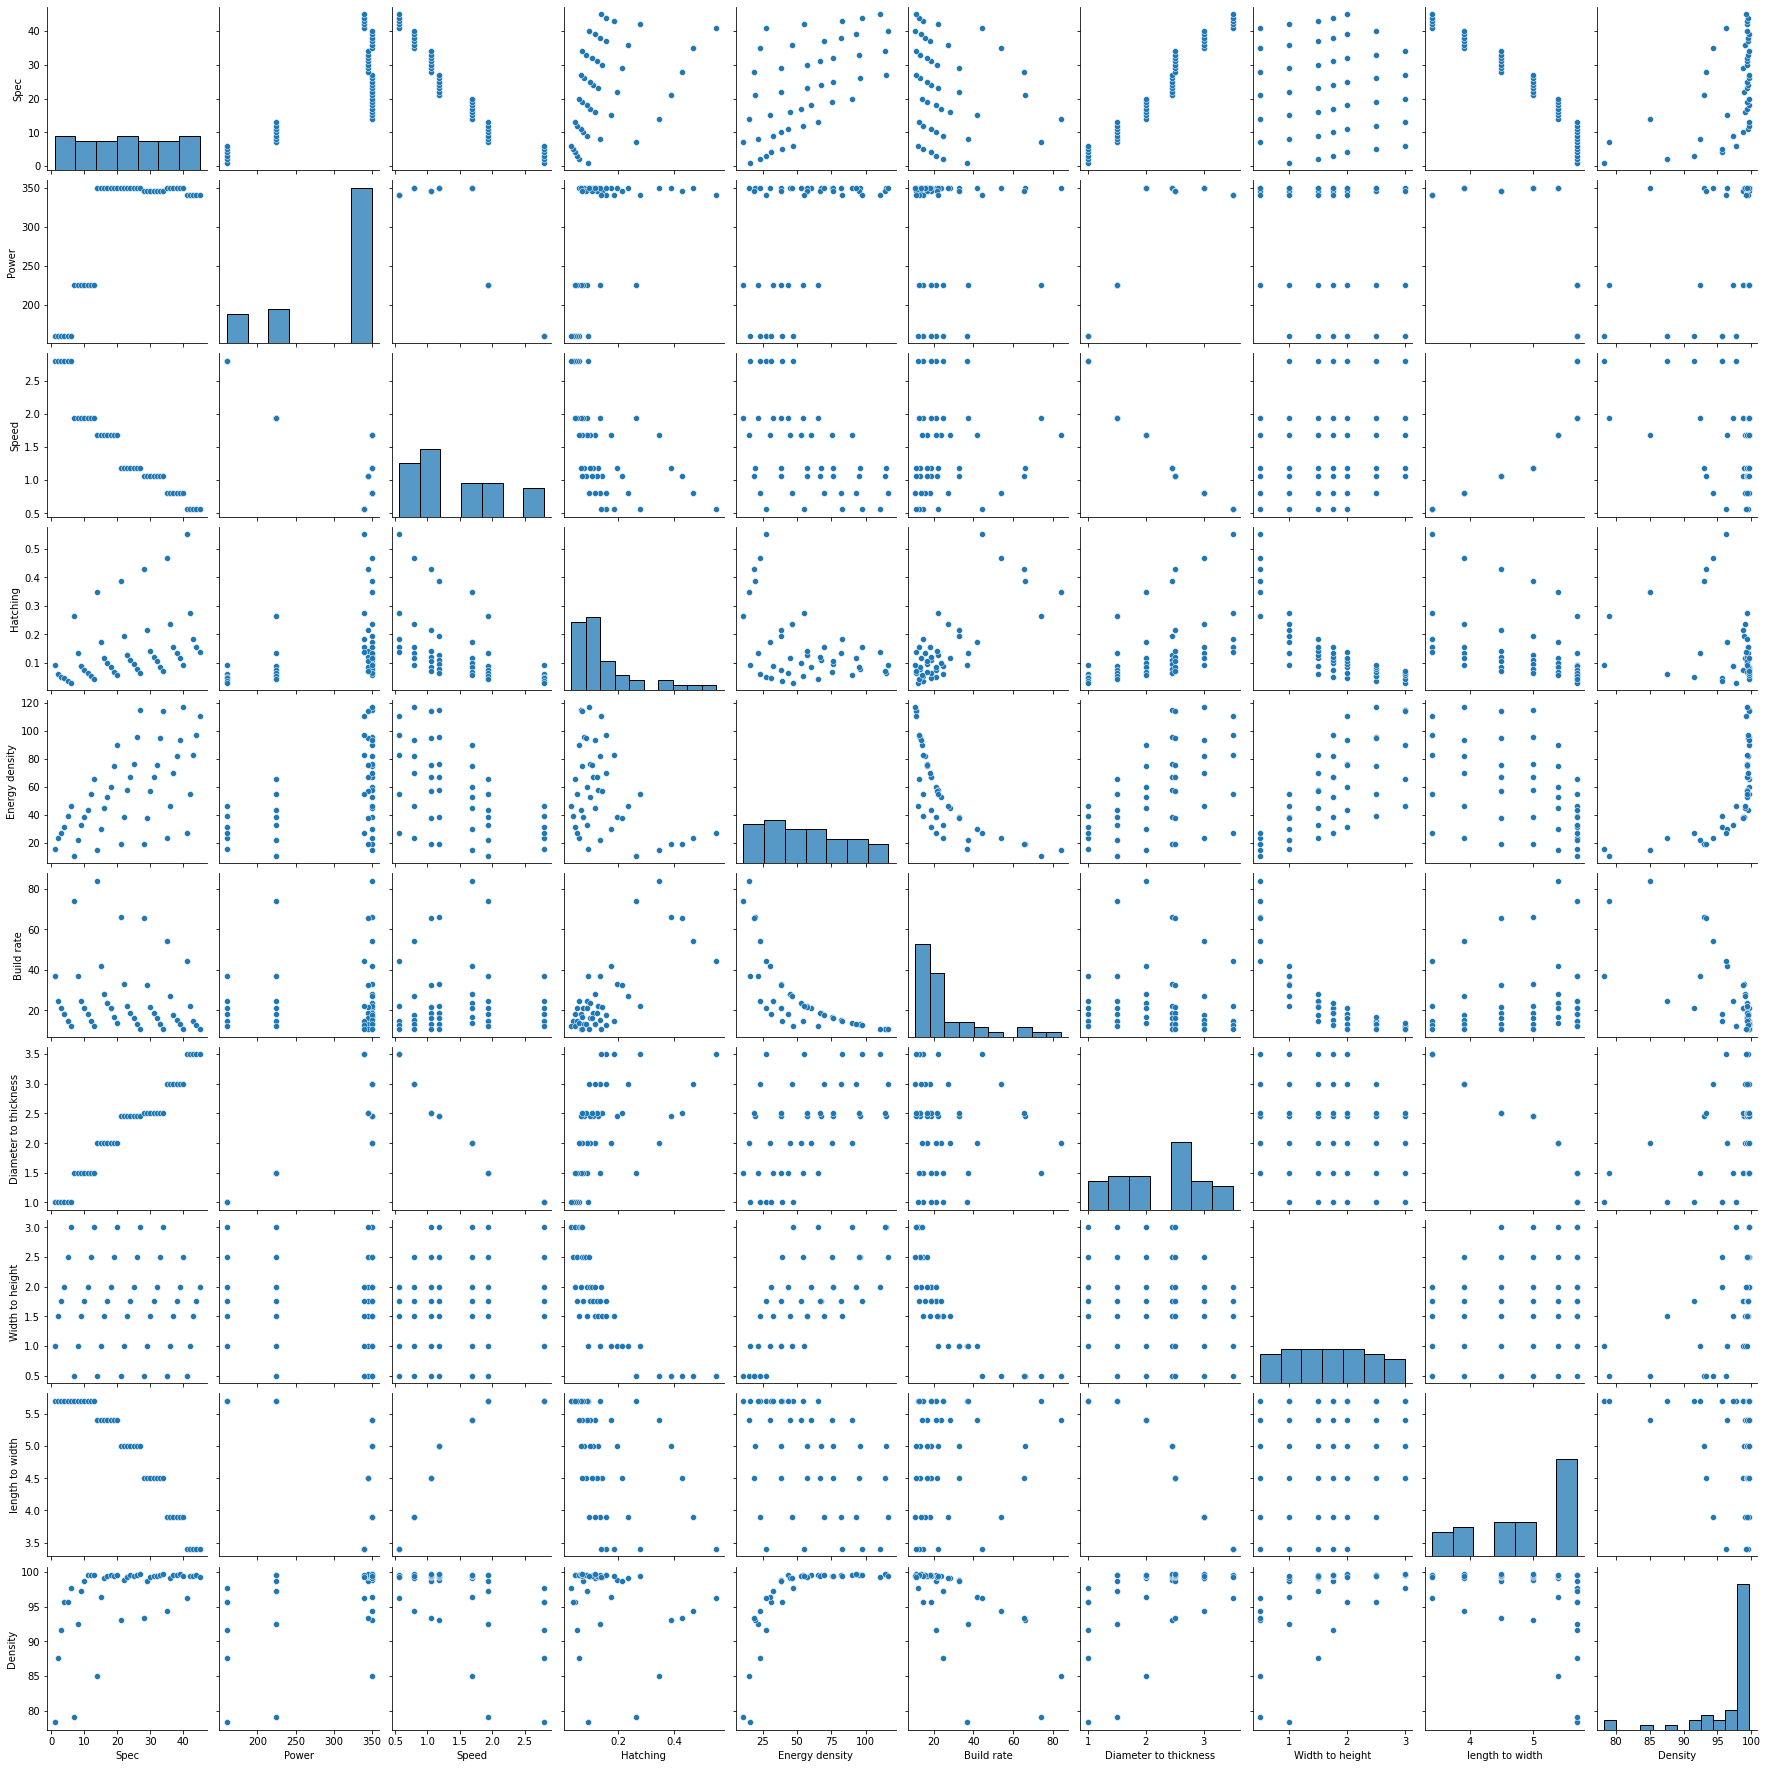

In [4]:
sns.pairplot(data)

In [5]:
data.isnull().sum()

Spec                     0
Power                    0
Speed                    0
Hatching                 0
Energy density           0
Build rate               0
Diameter to thickness    0
Width to height          0
length to width          0
Density                  0
dtype: int64

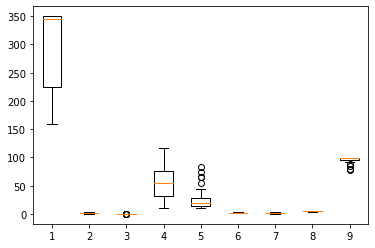

In [25]:
Power = data["Power"]
Speed = data['Speed']
Hatching = data['Hatching']
Build_rate= data['Build rate']
Energy_density= data['Energy density']
Diameter_to_thickness= data['Diameter to thickness']
Width_to_height= data['Width to height']
length_to_width	= data['length to width']
Density= data['Density']



columns = [Power, Speed, Hatching, Energy_density,Build_rate,Diameter_to_thickness,Width_to_height,length_to_width,Density]

fig, ax = plt.subplots()
ax.boxplot(columns)
plt.show()

<AxesSubplot:>

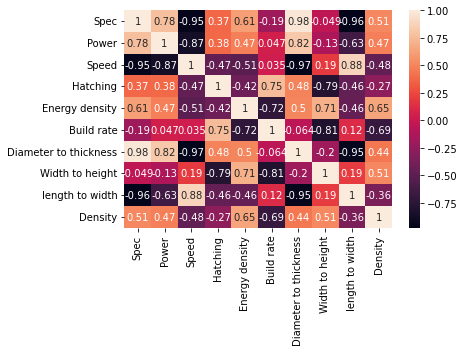

In [52]:
sns.heatmap(data.corr(),annot=True)


In [97]:
x=data[['Power','Speed','Hatching','Energy density','Build rate']]

In [98]:
y=data[['Density']]

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state=0)

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
dtree = DecisionTreeRegressor()

In [102]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [103]:
dtree.score(x_train,y_train)

1.0

In [104]:
dtree.score(x_test,y_test)

0.8853746550626186

In [113]:
prediction=dtree.predict(x_test)

In [114]:
from sklearn import metrics

In [115]:
MAE=metrics.mean_absolute_error(y_test, prediction)
MSE=metrics.mean_squared_error(y_test,prediction)
RMSE=np.sqrt(MSE)

In [116]:
MAE

2.791512345679021

In [117]:
MSE

8.365954398148205

In [118]:
RMSE

2.892395961508072

# Random Forest

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
x=data[['Power','Speed','Hatching','Energy density','Build rate']]
y=data[['Density']]

In [132]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [133]:
rfc = RandomForestRegressor(n_estimators=100)
rfc.fit(x_train, y_train)

C:\Users\hp\AppData\Local\Temp/ipykernel_16796/525582151.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


RandomForestRegressor()

In [134]:
rfc.score(x_train,y_train)

0.9503237995007903

In [135]:
rfc.score(x_test,y_test)

0.9196759664420673

In [155]:
prediction=rfc.predict(x_test)

In [157]:
MAE=metrics.mean_absolute_error(y_test, prediction)
MSE=metrics.mean_squared_error(y_test,prediction)
RMSE=np.sqrt(MSE)

In [158]:
MAE

1.0222108843537419

In [159]:
MSE

4.623244881762241

In [160]:
RMSE

2.150173221338746